In [1]:
import f3dasm

In [2]:
dimensions= 2
hyperparameters = {}
seed = 42
iterations = 20

In [3]:
design = f3dasm.make_nd_continuous_design(bounds=[-1.,1.], dimensions=dimensions)
# Sampler
lhs_sampler = f3dasm.sampling.LatinHypercubeSampling(doe=design, seed=seed)
data = lhs_sampler.get_samples(numsamples=5)
data.data


input           output
         x0        x1      y
0 -0.850184  0.883229    NaN
1 -0.137593 -0.137602    NaN
2  0.223233 -0.619714    NaN
3 -0.307202  0.546470    NaN
4  0.840446 -0.360537    NaN

In [4]:
data.get_n_best_input_parameters_numpy(1).ravel()


array([-0.85018395,  0.88322903])

In [5]:
sphere = f3dasm.simulation.Sphere(noise=False, dimensionality=dimensions)
leon = f3dasm.simulation.Leon(dimensionality=dimensions)
ackley = f3dasm.simulation.Ackley(dimensionality=dimensions)

langermann = f3dasm.simulation.Levy(dimensionality=dimensions, scale_bounds=[-1.,1.])

# Evaluate the initial samples
data.add_output(output=langermann(data),label="y")
data.data

input                output
         x0        x1           y
0 -0.850184  0.883229  399.620744
1 -0.137593 -0.137602   42.235494
2  0.223233 -0.619714   79.075732
3 -0.307202  0.546470   20.867168
4  0.840446 -0.360537   35.190649

In [6]:
opt = f3dasm.optimization.SGD(data=data, seed=seed)
opt.iterate(iterations=100, function=langermann)
d = opt.extract_data()
d.data
# opt1 = SGD(data=data)
# opt1.iterate(iterations=i, function=leon)

d.data


input                output
           x0        x1           y
0   -0.850184  0.883229  399.620744
1   -0.137593 -0.137602   42.235494
2    0.223233 -0.619714   79.075732
3   -0.307202  0.546470   20.867168
4    0.840446 -0.360537   35.190649
..        ...       ...         ...
100  1.000000  0.550000   53.891591
101  1.000000  0.550000   53.891591
102  1.000000  0.550000   53.891591
103  1.000000  0.550000   53.891591
104  1.000000  0.550000   53.891591

[105 rows x 3 columns]

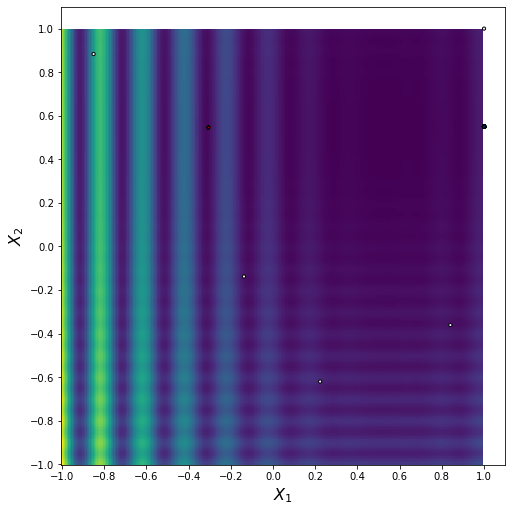

In [7]:
langermann.plot_data(data=d, domain=[-1.,1.])

(<Figure size 504x504 with 1 Axes>,
 <Axes3DSubplot:xlabel='$X_{1}$', ylabel='$X_{2}$'>)

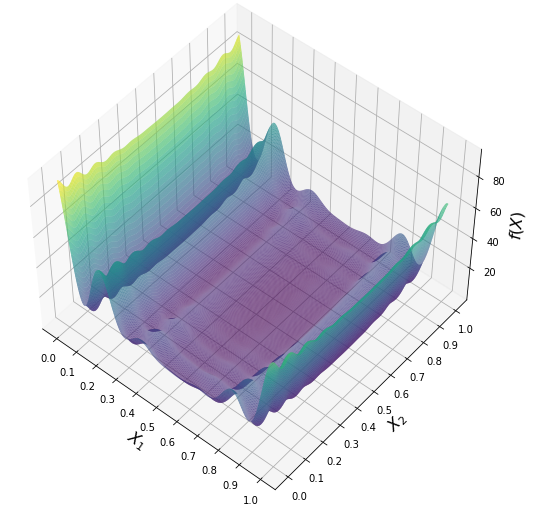

In [8]:
langermann.plot()